**IMPORT**

In [2]:
import pandas as pd
import json       
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [3]:
%run -i "function_m.py"

In [51]:
# %load "function.py"

In [5]:
data = []
with open('scout_3models.json') as f:
    for line in f:
        data.append(json.loads(line))       
autos = pd.DataFrame(data)
name_columns(autos)
pd.options.display.max_columns=None

In [6]:
v_cols=['comfort_convenience', 'extras', 'drive_chain',
       'electricity_consumption', 'emission_class', 'emission_label',
       'first_registration', 'fuel', 'nr_of_doors', 'nr_of_seats',
       'other_fuel_types', 'previous_owners', 'type', 'upholstery', 'warranty',
       'weight', 'prev_owner', 'url']

In [7]:
m_cols =['entertainment_media', 'availability', 'available_from', 'body',
       'body_color', 'body_color_original', 'full_service', 'gearing_type', 'gears',
       'inspection_new', 'last_service_date', 'last_timing_belt_service_date', 'paint_type',
       'null', 'price', 'registration', 'short_description', 'vat']

In [8]:
t_cols = ['safety_security', 'co2_emission', 'consumption', 'country_version', 
          'cylinders', 'displacement', 'make', 'model', 'model_code', 'next_inspection',
          'non_smoking_vehicle', 'body_type', 'description', "hp", 'kw', 'km', "make_model", 
          "offer_number"]

In [9]:
df_m = clean_m(autos[m_cols])

In [10]:
df_t = clean_t(autos[t_cols])

In [11]:
df_v=clean_v(autos[v_cols])

In [235]:
df_v.shape

(15919, 69)

In [60]:
df_m.shape

(15919, 23)

In [61]:
df_t.shape

(15919, 44)

In [12]:
df = df_t.join(df_m)

In [13]:
df=df.join(df_v)

In [14]:
df.shape

(15919, 135)

**EDA**

In [146]:
df.head()

,co2_emission,country_version,cylinders,displacement,make,model,model_code,next_inspection,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,available_from,body,body_color,gearing_type,gears,inspection_new,last_service_date,paint_type,price,vat,age,entertainment_media_bluetooth,entertainment_media_cd_player,entertainment_media_digital_radio,entertainment_media_hands_free_equipment,entertainment_media_mp3,entertainment_media_on_board_computer,entertainment_media_radio,entertainment_media_sound_system,entertainment_media_television,entertainment_media_usb,available_after_days,drive_chain,emission_class,emission_label,fuel,nr_of_doors,nr_of_seats,previous_owners,type,upholstery,warranty,url,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg,hp_new
0,99.0,NaN,3.0,1422.0,Audi,A1,0588/BDF,2021-06-01,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,56013.0,LR-062483,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,3.8,NaT,Sedans,Black,Automatic,NaN,1,NaT,Metallic,15770,VAT deductible,3.0,1,0,0,1,0,1,1,0,0,0,NaN,front,Euro 6,NaN,Diesel (Particulate Filter),5.0,5.0,2.0,Used,"Cloth, Black",1,https://www.autoscout24.com//offers/audi-a1-sp...,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1220.0,0.0
1,129.0,NaN,4.0,1798.0,Audi,A1,0588/BCY,NaT,Sicherheit: Deaktivierung für Beifahrer-Airbag...,141.0,80000.0,NaN,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,5.6,NaT,Sedans,Red,Automatic,7.0,0,NaT,NaN,14500,Price negotiable,2.0,1,0,0,1,0,1,1,1,0,0,NaN,front,Euro 6,4 (Green),Gasoline,3.0,4.0,NaN,Used,"Cloth, Grey",0,https://www.autoscout24.com//offers/audi-a1-1-...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1255.0,1.0
2,99.0,NaN,NaN,1598.0,Audi,A1,NaN,NaT,Sicherheit: Deaktivierung für Beifahrer-Airbag...,85.0,83450.0,AM-95365,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,3.8,NaT,Sedans,Black,Automatic,NaN,0,NaT,Metallic,14640,VAT deductible,3.0,0,0,0,0,1,1,0,0,0,0,NaN,front,Euro 6,4 (Green),Diesel (Particulate Filter),4.0,4.0,1.0,Used,"Cloth, Black",1,https://www.autoscout24.com//offers/audi-a1-sp...,1,0,0,0,0,1,0,0,1,0,0,0

**CONVERT OBJECT TYPES TO NUMERIC AND DROP DUPLICATED COLUMNS**

In [127]:
df.dtypes

co2_emission                                float64
country_version                              object
cylinders                                   float64
displacement                                 object
make                                         object
model                                        object
model_code                                   object
next_inspection                              object
description                                  object
hp                                          float64
km                                          float64
offer_number                                 object
ss_abs                                        int64
ss_adaptive_cruise_control                    int64
ss_adaptive_headlights                        int64
ss_alarm_system                               int64
ss_blind_spot_monitor                         int64
ss_central_door_lock                          int64
ss_central_door_lock_with_remote_control      int64
ss_daytime_r

In [ ]:
#body_type and body columns might be identical.

In [130]:
(df.body_type==df.body).sample(10)

11918    True
6994     True
10449    True
15299    True
9280     True
974      True
11316    True
5619     True
4098     True
3835     True
dtype: bool

In [153]:
# body_type and body columns are identical columns. We need to drop one of them.

In [15]:
df.drop(['body_type'], axis=1, inplace=True)

In [ ]:
#Define wrong type columns:

In [70]:
df.gears.dtypes

dtype('O')

In [152]:
# gears column consist of numbers. So let's convert it to numeric.

In [16]:
df['gears'] = pd.to_numeric(df.gears)

In [73]:
df.gears.dtypes

dtype('float64')

In [ ]:
# convert consumption_comb column

In [74]:
type(df.consumption_comb[0])

str

In [17]:
df['consumption_comb'] = pd.to_numeric(df.consumption_comb)

In [77]:
type(df.consumption_comb[0])

numpy.float64

In [164]:
# convert nr_of_doors column

In [78]:
type(df.nr_of_doors[0])

str

In [18]:
df['nr_of_doors'] = pd.to_numeric(df.nr_of_doors)

In [80]:
type(df.nr_of_doors[0])

numpy.float64

In [165]:
# convert hp column

In [82]:
type(df.hp[0])

str

In [19]:
df['hp'] = pd.to_numeric(df.hp)

In [84]:
type(df.hp[0])

numpy.float64

In [166]:
# convert km column

In [86]:
df.km.dtypes

dtype('O')

In [87]:
type(df.km[0])

str

In [20]:
df['km'] = pd.to_numeric(df.km)

In [89]:
type(df.km[0])

numpy.float64

In [137]:
# Let's see if there are still "object" type columns to be converted to numeric
df.dtypes[df.dtypes == 'object']

country_version        object
displacement           object
make                   object
model                  object
model_code             object
next_inspection        object
description            object
offer_number           object
entertainment_media    object
body                   object
body_color             object
gearing_type           object
paint_type             object
vat                    object
drive_chain            object
emission_class         object
emission_label         object
first_registration     object
fuel                   object
nr_of_seats            object
previous_owners        object
type                   object
upholstery             object
prev_owner             object
url                    object
weight_kg              object
dtype: object

In [138]:
df.describe(include = "object")

,country_version,displacement,make,model,model_code,next_inspection,description,offer_number,entertainment_media,body,body_color,gearing_type,paint_type,vat,drive_chain,emission_class,emission_label,first_registration,fuel,nr_of_seats,previous_owners,type,upholstery,prev_owner,url,weight_kg
count,7586,15423,15919,15919,4978,3535,15919,12744,14545,15859,15322,15919,10147,11406,9061,12291,3945,14322,15919,14942,9279,15917,12199,9091,15919,8945
unique,23,77,3,9,232,69,12874,11440,346,9,14,3,3,2,3,6,5,4,77,6,5,5,46,4,15919,434
top,Germany,1598,Opel,A3,0035/BCB,,[],LT67679,"[Bluetooth, Hands-free equipment, On-board com...",Sedans,Black,Manual,Metallic,VAT deductible,front,Euro 6,4 (Green),2018,Diesel (Particulate Filter),5,1,Used,"Cloth, Black",1,https://www.autoscout24.com//offers/opel-insig...,1163
freq,4502,4761,7343,3097,268,710,636,27,1282,7903,3745,8153,9794,10980,8886,10139,3553,4522,4315,13336,8294,11096,5821,8294,1,574


In [ ]:
# displacement, nr_of_seats, previous_owners, prev_owner and weight_kg columns must be numeric.
# So there are 5 more columns to be converted to numeric

In [21]:
df['displacement'] = pd.to_numeric(df.displacement)

In [22]:
df['nr_of_seats'] = pd.to_numeric(df.nr_of_seats)

In [23]:
df['previous_owners'] = pd.to_numeric(df.previous_owners)

In [24]:
df['prev_owner'] = pd.to_numeric(df.prev_owner)

In [25]:
df['weight_kg']=pd.to_numeric(df.weight_kg)

In [ ]:
# previous_owners and df.prev_owner columns might be identical. We might drop one of them. 

In [147]:
df.prev_owner.head()

0    2.0
1    NaN
2    1.0
3    1.0
4    1.0
Name: prev_owner, dtype: float64

In [146]:
df.previous_owners.head()

0      2
1    NaN
2      1
3      1
4      1
Name: previous_owners, dtype: object

In [26]:
# Drop one of them.
df.drop('prev_owner', axis=1, inplace=True)

In [149]:
# age and first_registration columns:

In [150]:
df.age.head()

0    3.0
1    2.0
2    3.0
3    3.0
4    3.0
Name: age, dtype: float64

In [156]:
df.first_registration.head()

0    2016
1    2017
2    2016
3    2016
4    2016
Name: first_registration, dtype: object

In [27]:
# 'age' and firs_registration include same info. We can drop one of them. 
df.drop('first_registration', axis=1, inplace=True)

In [171]:
# Re-Check the object columns 
df.describe(include = "object")

,country_version,make,model,model_code,description,offer_number,entertainment_media,body,body_color,gearing_type,paint_type,vat,drive_chain,emission_class,emission_label,fuel,type,upholstery,url
count,7586,15919,15919,4978,15919,12744,14545,15859,15322,15919,10147,11406,9061,12291,3945,15919,15917,12199,15919
unique,23,3,9,232,12874,11440,346,9,14,3,3,2,3,6,5,77,5,46,15919
top,Germany,Opel,A3,0035/BCB,[],LT67679,"[Bluetooth, Hands-free equipment, On-board com...",Sedans,Black,Manual,Metallic,VAT deductible,front,Euro 6,4 (Green),Diesel (Particulate Filter),Used,"Cloth, Black",https://www.autoscout24.com//offers/opel-insig...
freq,4502,7343,3097,268,636,27,1282,7903,3745,8153,9794,10980,8886,10139,3553,4315,11096,5821,1


In [160]:
# next_inspection column must be date time (first row:06/21)
type(df.next_inspection[0])

str

In [173]:
# convert next_inspection column to date time.

In [28]:
df['next_inspection'] = pd.to_datetime(df['next_inspection'])

**POSSIBLE PROBLEMS IN COLUMNS**

In [ ]:
# max value of co2 emmision is 990. That might be an outlier.
# min value of dispacement and hp are 1. 
# max value of gears is 50 while mean is 5.6
# there are 77 different fuel types.

**MISSING VALUES**

In [226]:
df.isnull().mean()[df.isnull().mean() > 0].sort_values(ascending=True)

type                    0.000126
body                    0.003769
hp                      0.005528
nr_of_doors             0.013317
displacement            0.031158
body_color              0.037502
nr_of_seats             0.061373
km                      0.064326
entertainment_media     0.086312
age                     0.100320
co2_emission            0.153025
consumption_comb        0.181104
offer_number            0.199447
emission_class          0.227904
upholstery              0.233683
vat                     0.283498
gears                   0.295998
cylinders               0.356806
paint_type              0.362586
previous_owners         0.417112
drive_chain             0.430806
weight_kg               0.438093
country_version         0.523463
model_code              0.687292
emission_label          0.752183
next_inspection         0.822539
available_after_days    0.960111
last_service_date       0.968214
available_from          0.982913
dtype: float64

In [221]:
# Beside the columns without missing value (we filtered with "df.isnull().mean() > 0") type column is almsost full.
# While available_from column is almost completely missing.

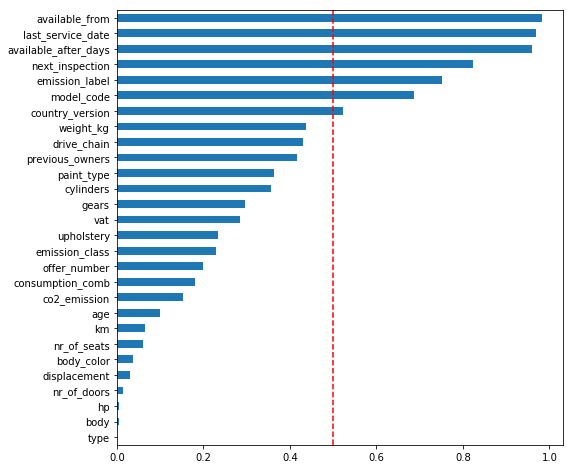

In [29]:
# Percentage of missing values withing columns
ax = df.isnull().mean()[df.isnull().mean() > 0].sort_values().plot.barh(figsize=(8,8))
ax.axvline(x=0.5, color='r', linestyle='--')

**HEAT MAP**

In [33]:
# designate columns_new that consist of numeric variables.
columns_new=["price", "co2_emission", "km", "consumption_comb",
              "age", "nr_of_doors", "warranty", "hp", "cylinders", "displacement",
            "gears","nr_of_seats", "weight_kg"]
df_new=df[columns_new]

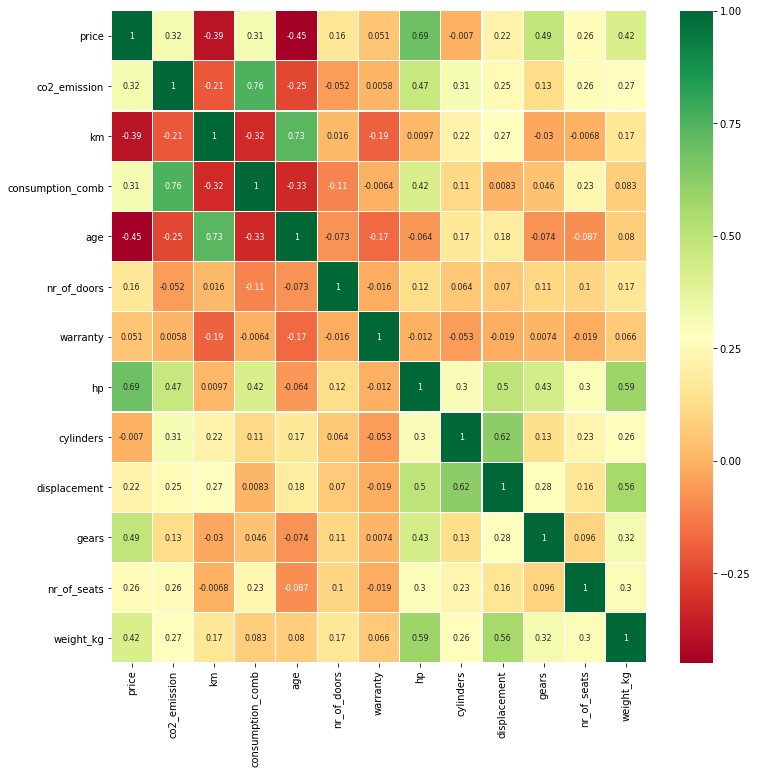

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':8})

In [256]:
# strong positive correlation between price and hp.
# positive corr btwn price and both gears and weight_kg.
# negative correlation between price and km, also btwn price and age.
# a noticeable positive correlation between co2 emission and consumption_comb.
# strong positive corr btwrn km and age.
# nr_of_doors and warrant columns: almost no corr with any other columns.
# positive corr btwn weight_kg and hp.

**PAIR PLOT**

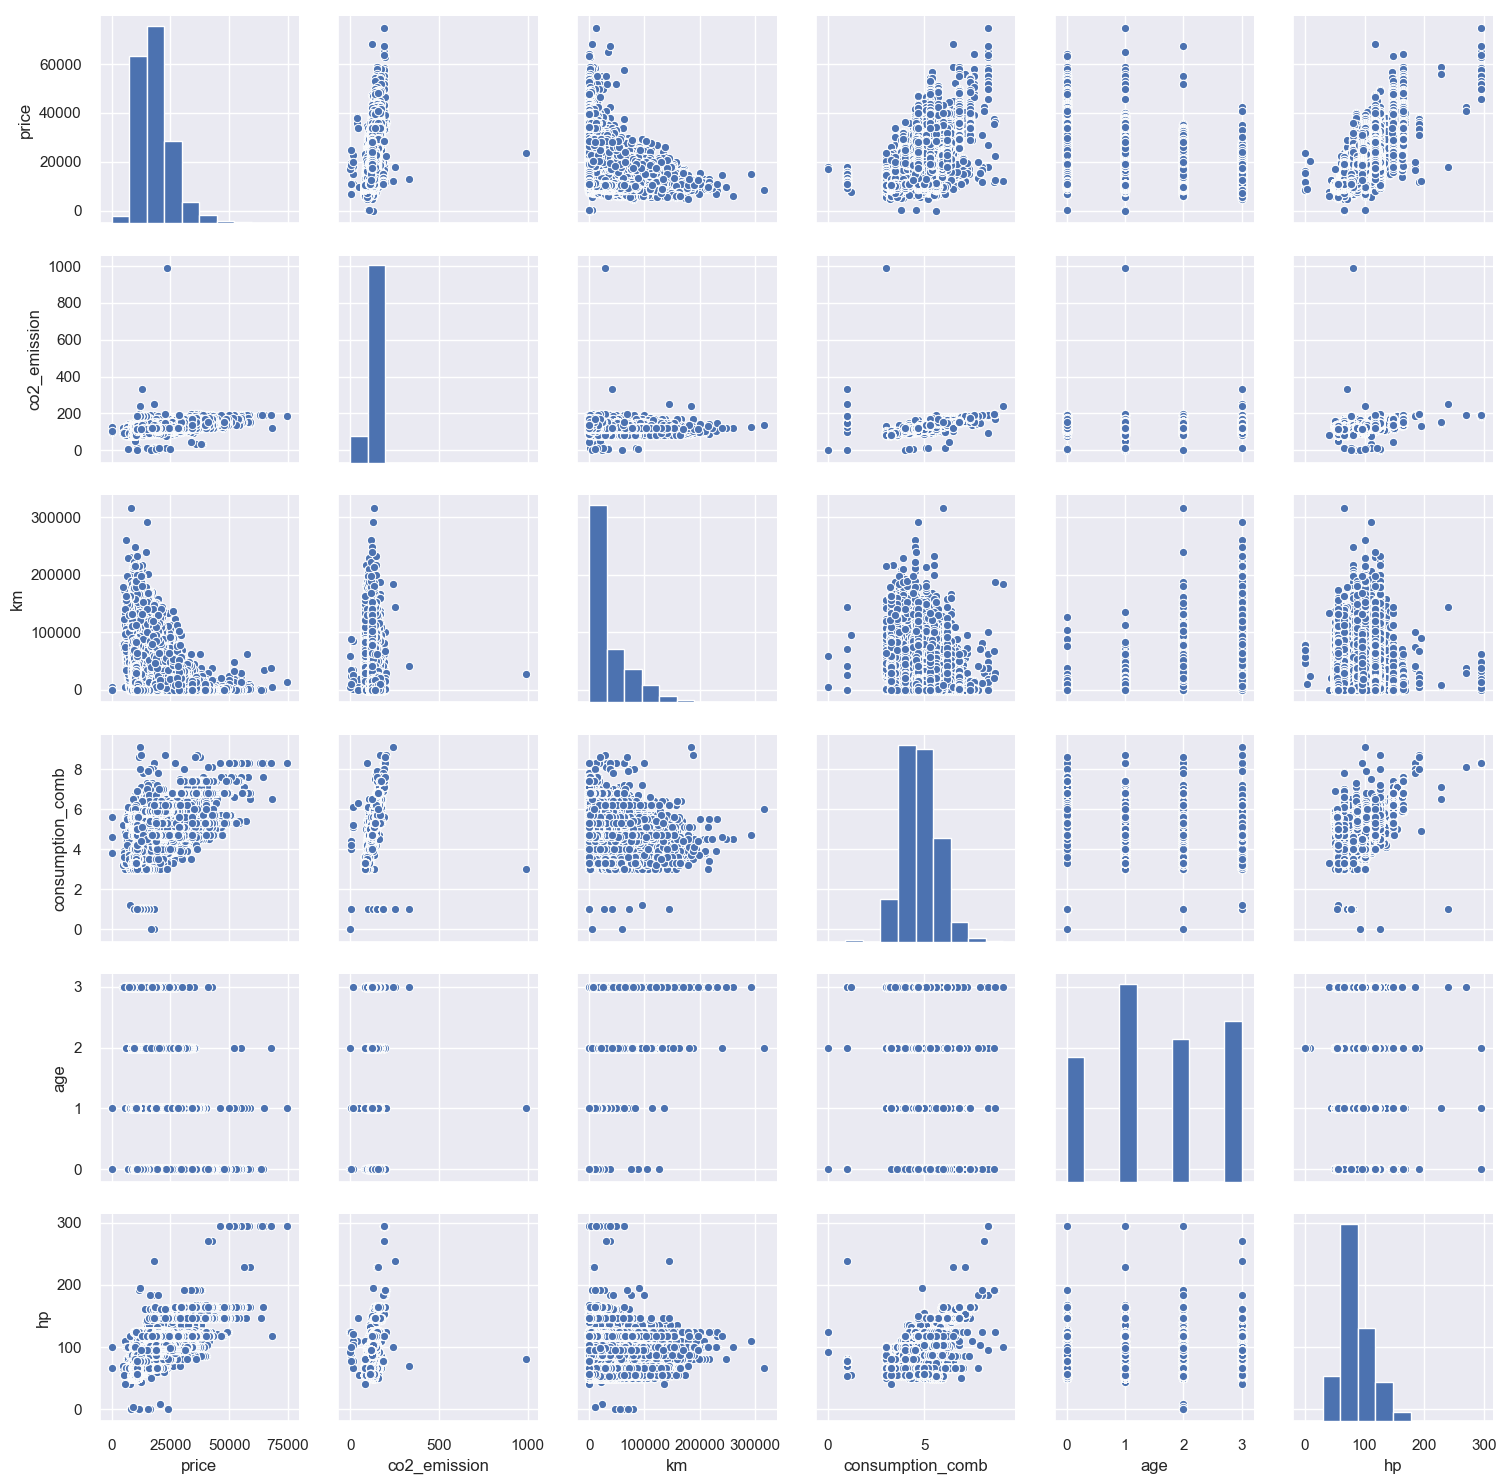

In [259]:
# aqcuire another list of columns called "cals" from important columns of columns_new. 
# And see the scatter plot of these columns.
sns.set()
cols=["price", "co2_emission", "km", "consumption_comb", "age", "hp"]
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [ ]:
# We can see the outliers in co2 column.
# price-km dist is meaningfull.

**PRICE**

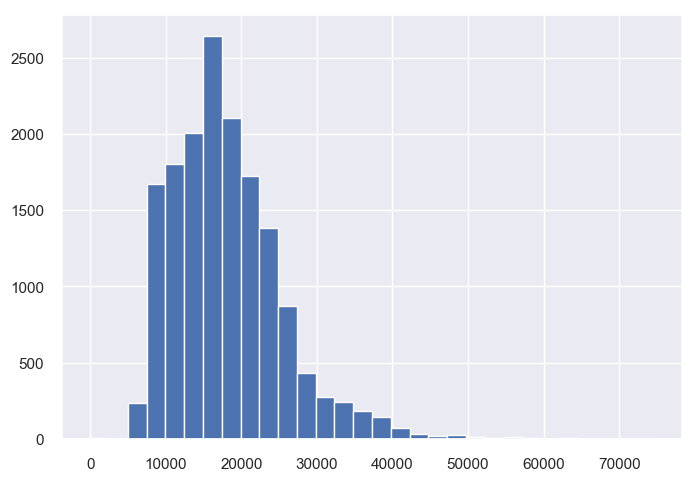

In [262]:
df['price'].hist(bins=30)

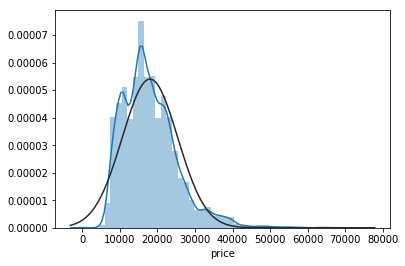

In [176]:
sns.distplot(df.price, fit=norm)

In [177]:
print("Skewness: %f" % df['price'].skew())

Skewness: 1.231883


In [178]:
print("Kurtosis: %f" % df['price'].kurt())

Kurtosis: 2.961370


In [ ]:
# 1.2>0 suggests non-normality (normal dist: skewness=0, kurtosis=3, excess kurtosis=0)
# skewed to right

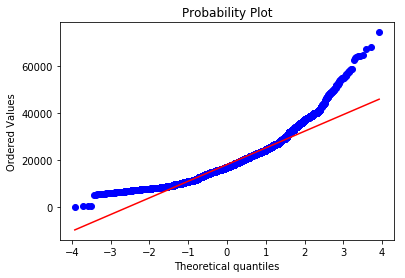

In [179]:
fig = plt.figure()
res=stats.probplot(df['price'], plot=plt)

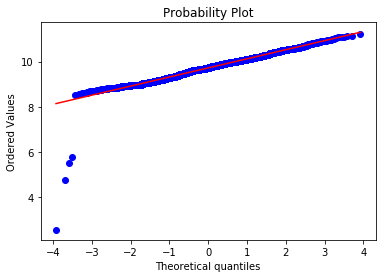

In [180]:
res=stats.probplot(np.log(df['price'].values), plot=plt)

In [ ]:
# Probplot show that price column needs to scaled. And four dots below the line are most probably outliers.

In [37]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [103]:
## 13 euros price for a car is interesting. So let's find the 4 cars with lowest price. 

In [181]:
df.sort_values(by = 'price', ascending = True)[:4]

,co2_emission,country_version,cylinders,displacement,make,model,model_code,next_inspection,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,entertainment_media,available_from,body,body_color,gearing_type,gears,inspection_new,last_service_date,paint_type,price,vat,age,entertainment_media_bluetooth,entertainment_media_cd_player,entertainment_media_digital_radio,entertainment_media_hands_free_equipment,entertainment_media_mp3,entertainment_media_on_board_computer,entertainment_media_radio,entertainment_media_sound_system,entertainment_media_television,entertainment_media_usb,available_after_days,drive_chain,emission_class,emission_label,fuel,nr_of_doors,nr_of_seats,previous_owners,type,upholstery,warranty,url,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
8594,128.0,NaN,4.0,1398.0,Opel,Corsa,1844/ADJ,NaT,[],66.0,123.0,NaN,1,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,False,5.6,"[Bluetooth, CD player, Hands-free equipment, M...",NaT,Sedans,Gold,Manual,5.0,0,NaT,NaN,13,None,1.0,1,1,0,1,1,1,1,0,0,1,NaN,NaN,Euro 6d-TEMP,NaN,Gasoline,3.0,5.0,NaN,Used,NaN,0,https://www.autoscout24.com//offers/opel-corsa...,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1141.0
8828,107.0,Netherlands,3.0,999.0,Opel,Corsa,NaN,NaT,[\nOpel Bestaat 120 jaar en trakteert! €120 PE...,66.0,12.0,49361,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1,0,0,False,4.6,"[Digital radio, On-board computer, Radio]",NaT,Compact,Grey,Manual,6.0,0,NaT,Metallic,120,None,0.0,0,0,1,0,0,1,1,0,0,0,NaN,NaN,Euro 6,NaN,Gasoline,5.0,5.0,NaN,New,"Cloth, Black",1,https://www.autoscout24.com//offers/opel-corsa...,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1099.0
6066,101.0,NaN,4.0,1598.0,Opel,Astra,NaN,NaT,[],100.0,5563.0,NaN,1,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,0,False,3.8,"[Bluetooth, Hands-free equipment, On-board com...",NaT,Station wagon,Gold,Manual,6.0,0,NaT,NaN,255,None,1.0,1,0,0,1,0,1,1,0,0,1,NaN,NaN,Euro 6,NaN,Diesel (Particulate Filter),5.0,5.0,NaN,Used,NaN,0,https://www.autoscout24.com//offers/opel-astra...,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0

In [ ]:
#there are four cars with a very low price: 13, 120, 255, 331 euros prepectively. (index numbers:8594, 8828, 6066, 8829)

In [182]:
df_price_dropped = df.drop([8594, 8828, 6066, 8829], axis=0)

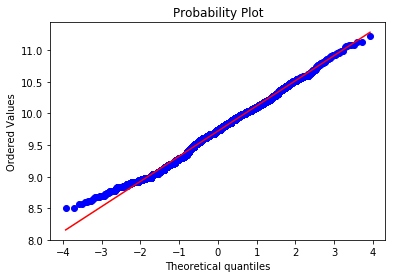

In [183]:
res = stats.probplot(np.log(df_price_dropped['price'].values), plot=plt)

In [264]:
print("Skewness: %f" % np.log(df_price_dropped['price'].skew()))

Skewness: 0.212017


In [287]:
# At this phase we will not drop any rows from original df. Maybe price will be the dependent variable.
# But if do and apply a log tranf to price column it will seem like this. And the skewness will be 0.21

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

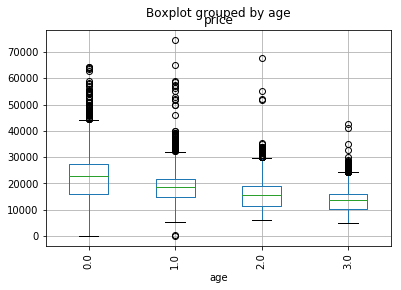

In [185]:
df.boxplot(column='price', by = 'age')
plt.xticks(rotation=90)

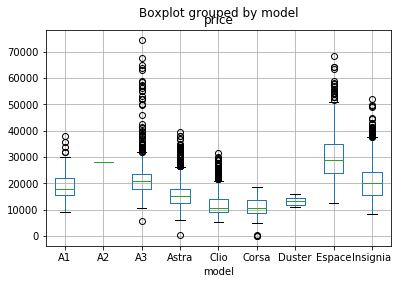

In [187]:
df.boxplot(column='price', by = 'model')

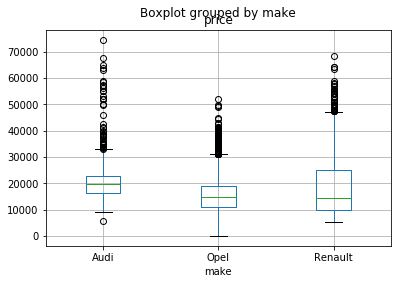

In [188]:
df.boxplot(column='price', by = 'make')

**HP**

In [189]:
df.hp.describe()

count    15831.000000
mean        88.367696
std         26.835135
min          1.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp, dtype: float64

In [ ]:
#sdt is very high. Scaling might be considered.

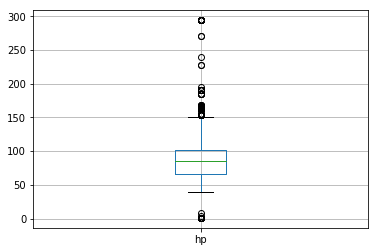

In [134]:
df.boxplot('hp')

In [135]:
df.hp[df.hp<20]

3913     9.0
6005     1.0
6034     1.0
6946     1.0
7014     1.0
7016     1.0
7018     1.0
7019     1.0
9285     1.0
9287     1.0
9288     1.0
9289     1.0
9290     1.0
9292     1.0
9299     1.0
10468    1.0
10579    1.0
10580    1.0
10610    1.0
13885    4.0
15155    1.0
15156    1.0
Name: hp, dtype: float64

In [136]:
#there many cars with very low hp. Might be outlier.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


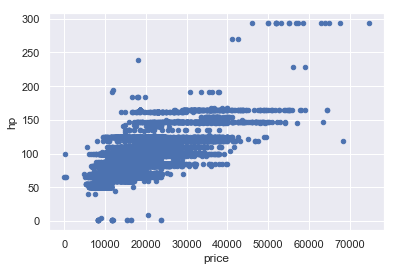

In [263]:
df.plot.scatter(x='price', y='hp')

In [262]:
print(df['price'].corr(df['hp']))

0.6938920382040906


**KM**

In [90]:
df.km.describe()

count     14895.000000
mean      34130.127828
std       37352.977568
min           0.000000
25%        5153.000000
50%       22740.000000
75%       49371.500000
max      317000.000000
Name: km, dtype: float64

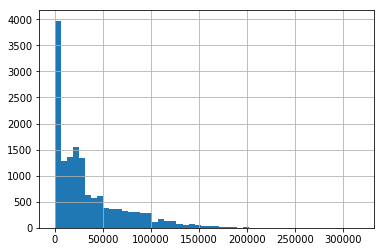

In [41]:
df['km'].hist(bins=50)

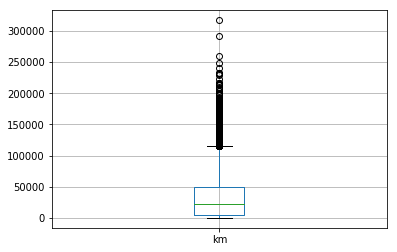

In [137]:
df.boxplot('km')

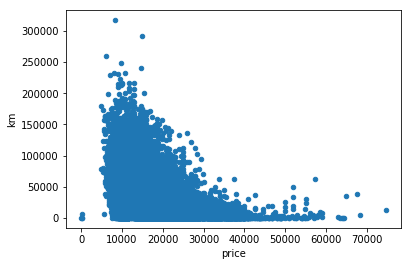

In [82]:
df.plot.scatter(x='price', y='km')

In [ ]:
#zero price for cars with zero km is not normal.

In [139]:
df.km[(df.km<1000) & (df.price<1000)]

8594    123.0
8828     12.0
8829     10.0
Name: km, dtype: float64

In [ ]:
#thre are 3 cars with km below 1000 and also price below 1000 might be outlier.

In [89]:
corr=df['price'].corr(df['km'])
print(corr)

-0.38782119044007707


**AGE**

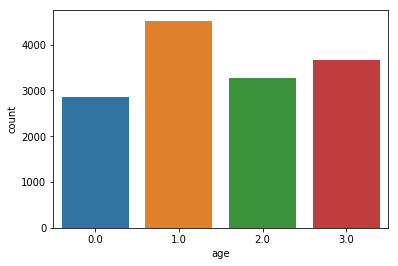

In [60]:
sns.countplot(df.age)

**CO2 EMISSION**

In [61]:
df.co2_emission.describe()

count    13483.000000
mean       117.953942
std         20.245589
min          0.000000
25%        104.000000
50%        116.000000
75%        129.000000
max        990.000000
Name: co2_emission, dtype: float64

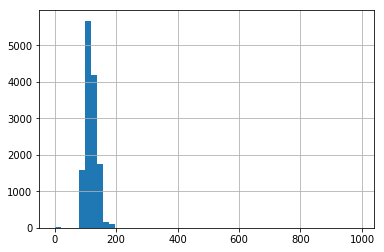

In [45]:
df['co2_emission'].hist(bins=50)

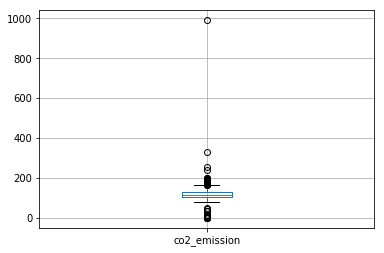

In [63]:
df.boxplot(column='co2_emission')

**CONSUMPTION_COMB**

In [74]:
df.consumption_comb.describe()

count    13036.000000
mean         4.784527
std          0.919294
min          0.000000
25%          4.000000
50%          4.700000
75%          5.400000
max          9.100000
Name: consumption_comb, dtype: float64

In [ ]:
#min value = 0 is problematic.

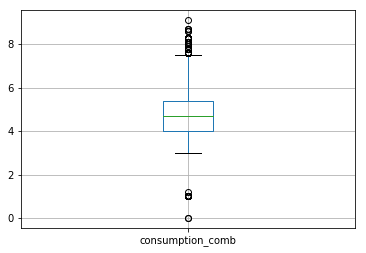

In [77]:
df.boxplot('consumption_comb')

In [79]:
df.consumption_comb[df.consumption_comb==0]

8217     0.0
10566    0.0
Name: consumption_comb, dtype: float64

In [ ]:
#two rows has 0 value in consumption_comb column.

In [80]:
df.fuel[df.consumption_comb==0]

8217     Super E10 95 (Particulate Filter)
10566          Diesel (Particulate Filter)
Name: fuel, dtype: object

In [ ]:
#and fuel types of these cars are above. 
#also cars with consumption_comb below 2 is strange. Let's see theese cars.

In [88]:
df.fuel[df.consumption_comb<2].value_counts()

Gasoline                             35
Diesel (Particulate Filter)           2
Diesel                                1
Super E10 95 (Particulate Filter)     1
Super 95                              1
Name: fuel, dtype: int64

In [89]:
# a car which's fuel type is gasoline and cons_comb is below 2. Strange!
# these 40 rows might be outlier or clue for fraud detection.

**GEARING TYPE**

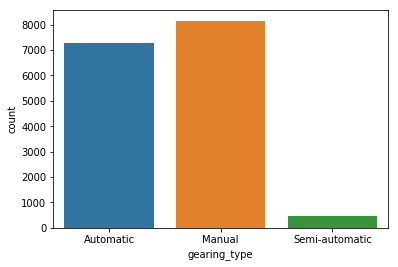

In [46]:
sns.countplot(df.gearing_type)

In [ ]:
df['gearing_type'].hist(bins=100)

**GEARS**

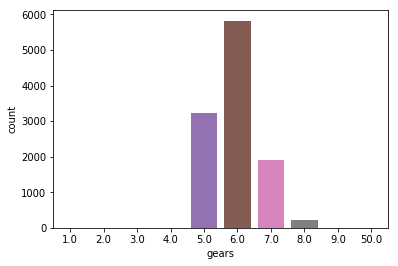

In [98]:
sns.countplot(df.gears)

In [ ]:
# number 50, 1, 2 and 3 for gears are strange. Should be outlier.

In [100]:
df.gears.value_counts()

6.0     5822
5.0     3239
7.0     1908
8.0      224
9.0        6
4.0        2
3.0        2
1.0        2
50.0       1
2.0        1
Name: gears, dtype: int64

***FUEL***

In [277]:
df.fuel.head()

0    Diesel (Particulate Filter)
1                       Gasoline
2    Diesel (Particulate Filter)
3    Diesel (Particulate Filter)
4    Diesel (Particulate Filter)
Name: fuel, dtype: object

In [278]:
df.fuel.value_counts()[:10]

Diesel (Particulate Filter)                4315
Super 95                                   3338
Gasoline                                   3175
Diesel                                     2984
Super 95 / Regular/Benzine 91               424
Regular/Benzine 91                          354
Super E10 95                                331
Super 95 (Particulate Filter)               268
Super 95 / Super E10 95                     131
Regular/Benzine 91 (Particulate Filter)     100
Name: fuel, dtype: int64

In [96]:
df.fuel.nunique()

77

In [ ]:
# fuel column should be rearanged by feature eng.

**DRIVE_CHAIN**

In [111]:
df.drive_chain.unique()

array(['front', nan, '4WD', 'rear'], dtype=object)

In [112]:
df.drive_chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

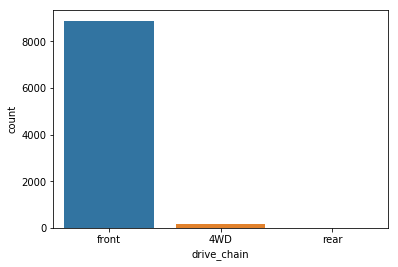

In [113]:
sns.countplot(df.drive_chain)

**EMISSION_CLASS** 

In [114]:
df.emission_class.unique()

array(['Euro 6', nan, 'Euro 5', 'Euro 6d-TEMP', 'Euro 6c', 'Euro 4',
       'Euro 6d'], dtype=object)

In [116]:
df.emission_class.value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

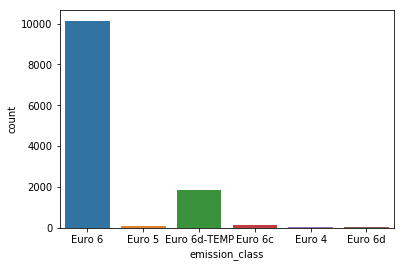

In [115]:
sns.countplot(df.emission_class)

**MAKE**

In [332]:
df.make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

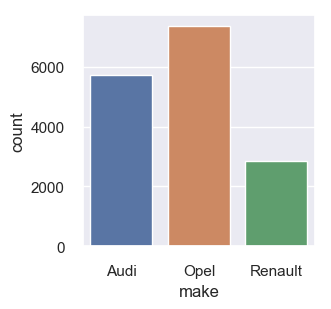

In [344]:
plt.figure(figsize=(3,3))
sns.countplot(df.make)

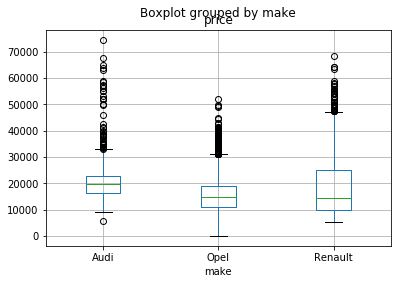

In [47]:
df.boxplot(column='price', by = 'make')

**MODEL**

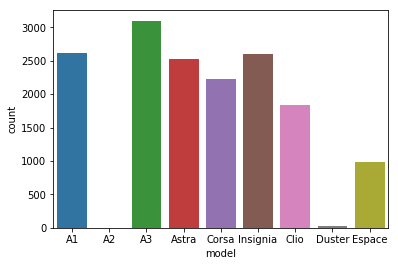

In [52]:
sns.countplot(df.model)

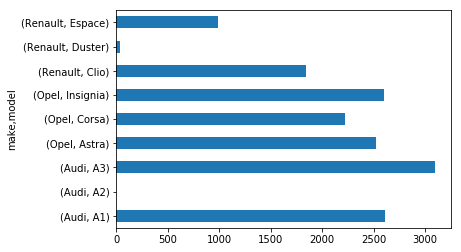

In [54]:
df.groupby(['make', 'model']).size().plot.barh()

In [ ]:
# is something strange about A2?

In [58]:
df.model[df.model=='A2'].value_counts()

A2    1
Name: model, dtype: int64

In [ ]:
#there is only one car in model A2. it's ok.

**BODY**

In [91]:
df.body.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body, dtype: int64

**BODY COLOR**

In [92]:
df.body_color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

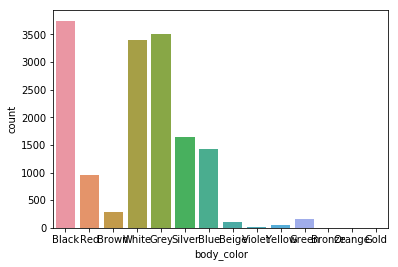

In [106]:
sns.countplot(df.body_color)

**PAINT_TYPE**

In [107]:
df.paint_type.unique()

array(['Metallic', nan, 'Uni/basic', 'Perl effect'], dtype=object)

In [110]:
df.paint_type.value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

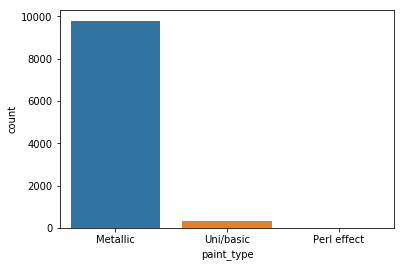

In [108]:
sns.countplot(df.paint_type)

**MODEL CODE**

In [60]:
df.model_code.isnull().mean()

0.6872919153213142

In [62]:
df.model_code.mode()

0    0035/BCB
dtype: object

In [64]:
df.model_code.value_counts()[:10]

0035/BCB    268
0588/BNO    245
0588/BDB    206
0588/BHX    188
0588/BDF    175
1844/ADJ    175
0588/BCV    139
3333/BAJ    122
3333/BEF    118
0588/AYB    117
Name: model_code, dtype: int64

**COUNTRY_VERSION** 

In [282]:
df.country_version.head()

0        NaN
1        NaN
2        NaN
3        NaN
4    Germany
Name: country_version, dtype: object

In [283]:
df.country_version.isnull().mean()

0.5234625290533325

In [285]:
df.country_version.value_counts()[:10]

Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Name: country_version, dtype: int64

In [287]:
df.country_version.unique()

array([nan, 'Germany', 'Italy', 'Belgium', 'Netherlands', 'Spain',
       'European Union', 'Switzerland', 'Austria', 'Luxembourg', 'France',
       'Denmark', 'Poland', 'Romania', 'Slovakia', 'Sweden',
       'Czech Republic', 'Hungary', 'Slovenia', 'Croatia', 'Egypt',
       'Serbia', 'Bulgaria', 'Japan'], dtype=object)

**NR_OF_DOORS**

In [117]:
df.nr_of_doors.unique()

array([ 5.,  3.,  4.,  2., nan,  1.,  7.])

In [118]:
df.nr_of_doors.value_counts(dropna=False)

5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
7.0        1
1.0        1
Name: nr_of_doors, dtype: int64

In [ ]:
# 1 door is not normal. But only one car has single door.

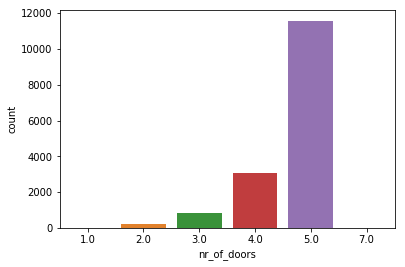

In [119]:
sns.countplot(df.nr_of_doors)

**NR_OF_SEATS**

In [120]:
df.nr_of_seats.unique()

array([ 5.,  4., nan,  6.,  3.,  2.,  7.])

In [121]:
df.nr_of_seats.value_counts(dropna=False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

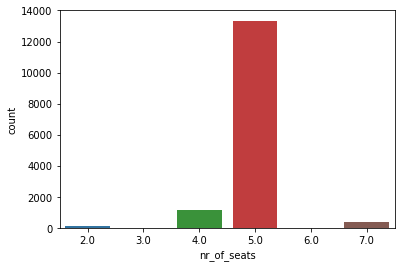

In [122]:
sns.countplot(df.nr_of_seats)

**TYPE**

In [123]:
df.type.unique()

array(['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered',
       nan], dtype=object)

In [124]:
df.type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

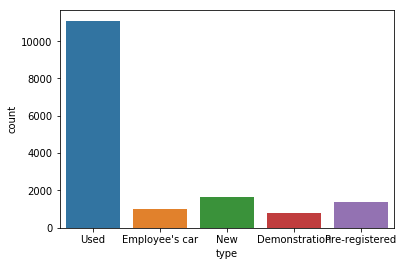

In [125]:
sns.countplot(df.type)

**CYLINDERS**

In [289]:
df.cylinders.head()

0    3.0
1    4.0
2    NaN
3    3.0
4    3.0
Name: cylinders, dtype: float64

In [290]:
df.cylinders.value_counts()

4.0    8105
3.0    2104
5.0      22
6.0       3
2.0       2
8.0       2
1.0       1
Name: cylinders, dtype: int64

In [309]:
# One cylinder number is interesting. Might be an outlier.

**DISPLACEMENT**

In [312]:
df.displacement.head()

0    1422.0
1    1798.0
2    1598.0
3    1422.0
4    1422.0
Name: displacement, dtype: float64

In [314]:
df.displacement.isnull().mean()

0.0311577360386959

In [315]:
df.weight_kg.head()

0    1220.0
1    1255.0
2       NaN
3    1195.0
4       NaN
Name: weight_kg, dtype: float64

In [ ]:
# it seems dispacement and weight are different things.

In [316]:
df.displacement.describe()

count    15423.000000
mean      1423.540881
std        333.530658
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: displacement, dtype: float64

In [ ]:
# min 1, and max 16000 might be outlier.

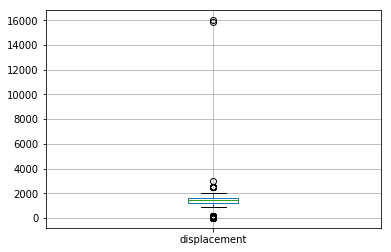

In [65]:
df.boxplot('displacement')

**NEXT_INSPECTION AND INSPECTION_NEW COLUMNS**

In [71]:
df.inspection_new.head()

0    1
1    0
2    0
3    0
4    1
Name: inspection_new, dtype: int32

In [73]:
df.next_inspection.head()

0   2021-06-01
1          NaT
2          NaT
3          NaT
4          NaT
Name: next_inspection, dtype: datetime64[ns]

**UPHOLSTERY**

In [131]:
df.upholstery.nunique()

46

In [133]:
df.upholstery.mode()

0    Cloth, Black
dtype: object

**VAT**

In [140]:
df.vat.unique()

array(['VAT deductible', 'Price negotiable', None], dtype=object)

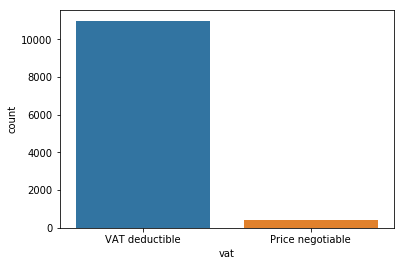

In [145]:
sns.countplot(df.vat)

**DUMMY COLUMNS**

In [218]:
dummy_prefixes = ['ss_', 'cc_', 'ext_', 'entertainment_']

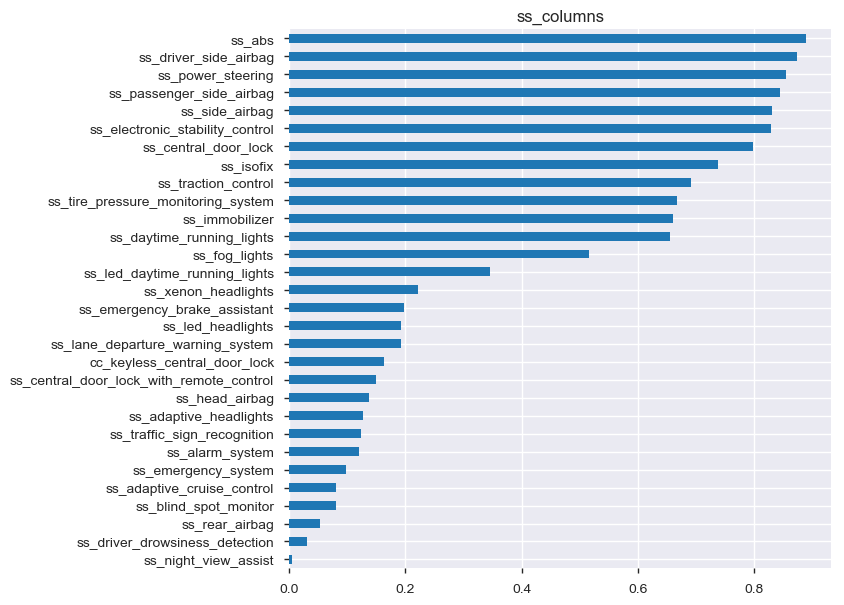

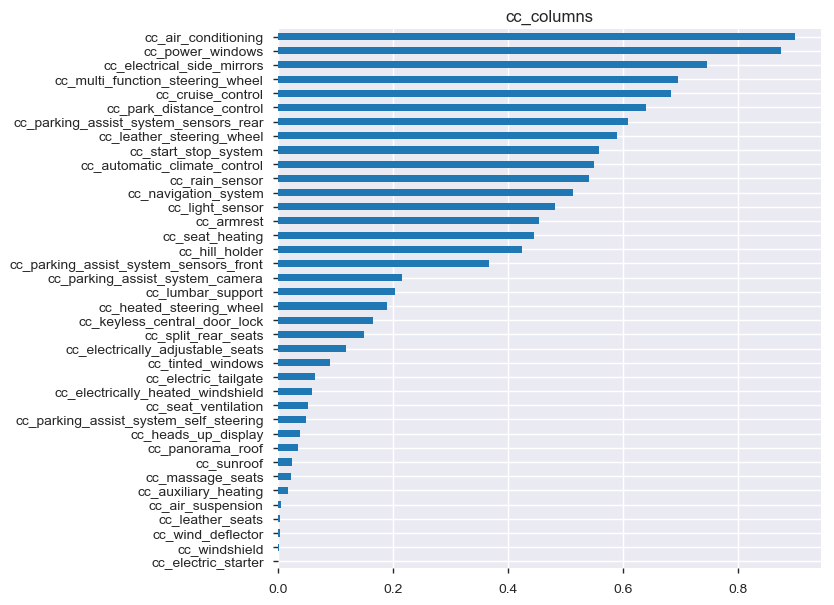

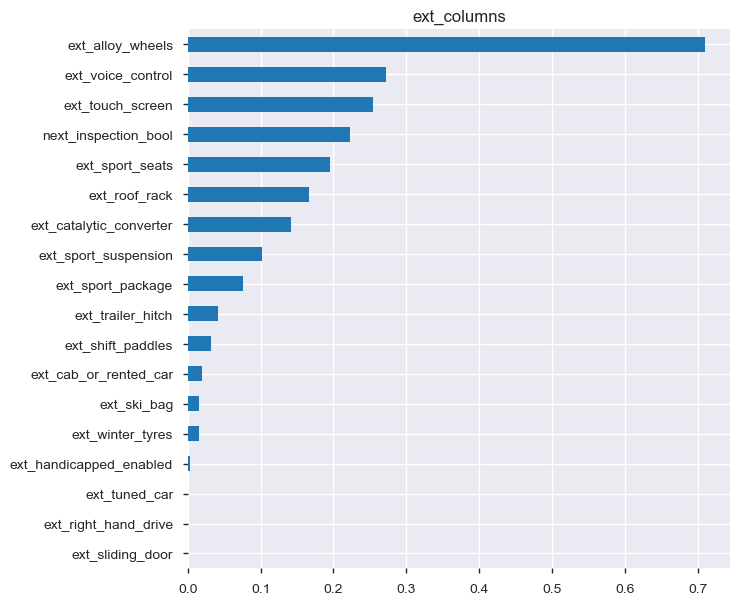

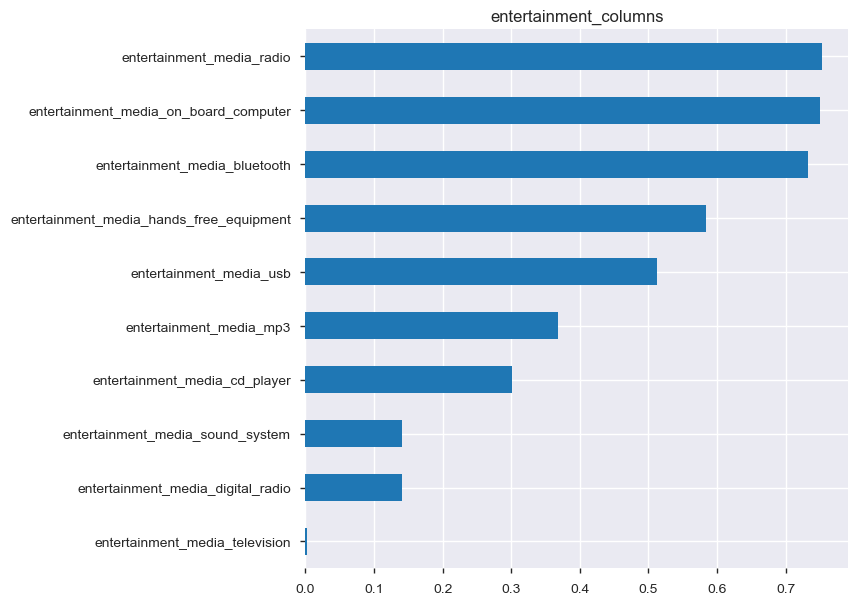

In [217]:
# Percentage '1's in Dummy columns
for i in dummy_prefixes:
    df.filter(like = i, axis = 1).mean().sort_values().plot.barh(figsize=(7,7))
    plt.title(i + "columns")
    plt.show()

##>> There seems to be many properties which are not very common among cars
##>>> However, those properties might prove more significant since the ones -such as ABS- 
##>>>> of which almost all the cars have may not affect the price

In [206]:
import pandas_profiling

In [209]:
profile = pandas_profiling.ProfileReport(df)

In [212]:
#profile.to_file(outputfile="outputfile.html")

In [ ]:
#display(profile)